# Projekt IAU  
## 1. časť - Prieskumná analýza 
### Vypracovali: Martin Kukučka, Martin Jankuliak
### Číslo datasetu: 80
### Podiel práce: 50/50

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import glob

import scipy as sc
from pandas import read_csv

### Načítanie dát

In [3]:
df_other_train = read_csv("data/other_train.csv")
df_personal_train = read_csv("data/personal_train.csv")

## Základný opis dát spolu s ich charakteristikami 

### Dataset other_train.csv

Pre predstavu tu je ukážka datasetu

In [9]:
df_other_train.head()

,Unnamed: 0,name,address,race,marital-status,occupation,pregnant,education-num,relationship,capital-gain,education,fnlwgt,class,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,0,Robert Plante,"3594 Johnson Green Suite 277\r\nJohnsonport, V...",White,Widowed,Other-service,f,5.0,Unmarried,0.0,9th,220019.0,1.0,<=50K,"{'mean_glucose':'106.71875','std_glucose':'48....",United-States,9.0,0.0,Private
1,1,Richard Huey,"350 Lewis Haven\r\nAngelaton, IN 39486",Asian-Pac-Islander,Never-married,Handlers-cleaners,f,13.0,Not-in-family,0.0,Bachelors,196899.0,0.0,<=50K,"{'mean_glucose':'118.609375','std_glucose':'na...",Haiti,50.0,0.0,Private
2,2,Joseph Sable,22509 Adrian Canyon Suite 799\r\nEast Timothyt...,White,Never-married,Exec-managerial,f,9.0,Unmarried,0.0,HS-grad,301591.0,0.0,<=50K,"{'mean_glucose':'129.4609375','std_glucose':'5...",United-States,35.0,0.0,Private
3,3,Gregory Preston,"2674 Daryl Island\r\nLake Sean, TN 89363",White,Married-civ-spouse,Exec-managerial,f,13.0,Husband,0.0,Bachelors,310320.0,1.0,>50K,"{'mean_glucose':'30.1015625','std_glucose':'37...",United-States,40.0,0.0,Private
4,4,Mike Riley,023 Joseph Estate Suite 799\r\nLake Andrewvill...,White,Married-civ-spouse,Handlers-cleaners,f,9.0,Husband,0.0,HS-grad,237943.0,0.0,<=50K,"{'mean_glucose':'124.0390625','std_glucose':'4...",United-States,60.0,0.0,private


Pomocou tohto príkazu zistíme počet riadkov

In [10]:
df_other_train.shape[0]

3983

A teraz počet atribútov pre tento dataset

In [11]:
df_other_train.shape[1]

19

Typy atribútov zistíme týmto príkazom

In [12]:
df_other_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3983 non-null   int64  
 1   name            3983 non-null   object 
 2   address         3983 non-null   object 
 3   race            3691 non-null   object 
 4   marital-status  3970 non-null   object 
 5   occupation      3961 non-null   object 
 6   pregnant        3969 non-null   object 
 7   education-num   3961 non-null   float64
 8   relationship    3954 non-null   object 
 9   capital-gain    3969 non-null   float64
 10  education       3972 non-null   object 
 11  fnlwgt          3968 non-null   float64
 12  class           3960 non-null   float64
 13  income          3972 non-null   object 
 14  medical_info    3966 non-null   object 
 15  native-country  3966 non-null   object 
 16  hours-per-week  3966 non-null   float64
 17  capital-loss    3973 non-null   f

Zistili sme, že tento dataset je zložený z atribútov:
- 6x float
- 1x int
- 12x object

Ďalej tu vidíme aj počet riadkov: 3983 ("RangeIndex: 3983 entries"),
a počet stĺpcov: 19 ("Data columns (total 19 columns)")

Nakoniec sa pozrieme na desktiptívne štatistiky.

In [13]:
df_other_train.describe()

,Unnamed: 0,education-num,capital-gain,fnlwgt,class,hours-per-week,capital-loss
count,3983.00000,3961.000000,3969.000000,3968.000000,3960.000000,3966.000000,3973.000000
mean,1991.00000,10.052764,1134.530108,189963.996976,0.256313,40.203984,72.926252
std,1149.93739,2.520019,8067.028170,102327.438172,0.436652,12.317838,360.910859
min,0.00000,1.000000,0.000000,20308.000000,0.000000,1.000000,0.000000
25%,995.50000,9.000000,0.000000,119475.250000,0.000000,40.000000,0.000000
50%,1991.00000,10.000000,0.000000,180585.500000,0.000000,40.000000,0.000000
75%,2986.50000,12.000000,0.000000,236173.000000,1.000000,45.000000,0.000000
max,3982.00000,16.000000,99999.000000,795830.000000,1.000000,99.000000,2824.000000


V tejto tabuľke vidíme štatistiky ako sú: počet záznamov (nenulových), priemer, štandardnú odchýlku, minimum, prvý kvartil, druhý kvartil (medián), tretí kvartil, maximum, pre všetky atribúty, ktoré obsahujú numerické hodnoty.

Atribút Unnamed: 0 môžeme ignorovať, pretože udáva index riadku, čo nie je hodnota, od ktorej by záviselo naše riešenie.

### Dataset personal_train.csv

Rovnako vykonáme opis dát aj pre druhý dataset

Ukážka datasetu

In [14]:
df_personal_train.head()

,Unnamed: 0,name,address,age,sex,date_of_birth
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",58,Male,1961-04-27
1,1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",43,Female,1976-09-12
2,2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",51,Male,1967-11-12
3,3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",66,Male,1953-06-02
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",45,Female,1974/09/11


Počet riadkov

In [15]:
df_personal_train.shape[0]

3933

Počet atribútov

In [16]:
df_personal_train.shape[1]

6

Typy atribútov

In [17]:
df_personal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3933 non-null   int64 
 1   name           3933 non-null   object
 2   address        3933 non-null   object
 3   age            3933 non-null   int64 
 4   sex            3933 non-null   object
 5   date_of_birth  3933 non-null   object
dtypes: int64(2), object(4)
memory usage: 184.5+ KB


Zistile sme, že tento dataset je zložený z atribútov:
- 2x int
- 4x object

Ďalej tu vidíme aj počet riadkov: 3933 ("RangeIndex: 3933 entries"),
a počet stĺpcov: 6 ("Data columns (total 6 columns)")

A Nakoniec desktiptívne štatistiky.

In [18]:
df_personal_train.describe()

,Unnamed: 0,age
count,3933.000000,3933.000000
mean,1966.000000,51.816934
std,1135.503633,11.814803
min,0.000000,-1.000000
25%,983.000000,44.000000
50%,1966.000000,52.000000
75%,2949.000000,60.000000
max,3932.000000,113.000000


V tejto štatistike nás zaujíma iba atribút age. Atribút Unnamed: 0 neriešime, je to len index riadku.

## Párová analýza dát

Načítanie datasetov a nahradenie pomlčiek podtržníkmi, premenovanie class na disease kvôli lepšej prehľadnosti a lepšej práci s atribútom a vymazanie stĺpca Unnamed: 0

In [19]:
df_other_train_analysis = read_csv("data/other_train.csv")
df_personal_train_analysis = read_csv("data/personal_train.csv")

df_other_train_analysis.columns = df_other_train_analysis.columns.str.replace('-', '_')
df_personal_train_analysis.columns = df_personal_train_analysis.columns.str.replace('-', '_')

df_other_train_analysis.rename(columns = {'class':'disease'}, inplace = True)
df_other_train_analysis = df_other_train_analysis.drop(columns = ['Unnamed: 0'])

Načítanie hodnôt zo stĺpca medical_info do osobitného datasetu

In [20]:
medical_line = df_other_train_analysis["medical_info"].str.replace(':', ',').str.replace("'", '').str.replace("{", '').str.replace("}", '')
medical_elements = medical_line.str.split(",", -1, expand = True)

diabetes_dataset = {}

for index in range(0, medical_elements.shape[1]):
    i = medical_elements[0][0]
    if(index % 2 == 0):
        diabetes_dataset[medical_elements[index][0]] = medical_elements[index + 1]

Zobrazenie prvých riadkov z nového data setu

In [21]:
diabetes_dataset = pd.DataFrame(diabetes_dataset)
diabetes_dataset.head()

,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,106.71875,48.59991922,0.48313819,0.060911664,6.269230769,29.92992523,6.026227617999999,38.46886389
1,118.609375,nan,0.386486255,-0.391453476,6.880434782999999,31.45280882,4.726094845,22.1326697
2,129.4609375,51.84771908,0.097801521,-0.17631789,1.074414716,12.3100408,14.03786226,224.8662321
3,30.1015625,37.99585501,4.505472298,20.78517939,75.45234114,78.74218273,0.894009245,-0.437248907
4,124.0390625,46.68133365,0.113198941,0.403242952,5.68812709,26.33443057,5.662103534,35.99633243


Spojenie nového data setu s pôvodným a vymazanie stĺpca medical_info

In [22]:
diabetes_dataset = pd.concat([df_other_train_analysis, diabetes_dataset.reindex(df_other_train_analysis.index)], axis = 1)
diabetes_dataset = diabetes_dataset.drop(columns = ['medical_info'])

Zobrazíme si informácie o celom data sete, vidíme, že hodnoty s ktorými chceme pracovať sú typu object.

In [23]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   race              3691 non-null   object 
 3   marital_status    3970 non-null   object 
 4   occupation        3961 non-null   object 
 5   pregnant          3969 non-null   object 
 6   education_num     3961 non-null   float64
 7   relationship      3954 non-null   object 
 8   capital_gain      3969 non-null   float64
 9   education         3972 non-null   object 
 10  fnlwgt            3968 non-null   float64
 11  disease           3960 non-null   float64
 12  income            3972 non-null   object 
 13  native_country    3966 non-null   object 
 14  hours_per_week    3966 non-null   float64
 15  capital_loss      3973 non-null   float64
 16  workclass         3966 non-null   object 


Hodnoty, ktoré chceme spracovať a sú typu object, pretypujeme na float

In [24]:
diabetes_dataset['mean_glucose'] = diabetes_dataset['mean_glucose'].astype(float)
diabetes_dataset['std_glucose'] = diabetes_dataset['std_glucose'].astype(float)
diabetes_dataset['kurtosis_glucose'] = diabetes_dataset['kurtosis_glucose'].astype(float)
diabetes_dataset['skewness_glucose'] = diabetes_dataset['skewness_glucose'].astype(float)
diabetes_dataset['mean_oxygen'] = diabetes_dataset['mean_oxygen'].astype(float)
diabetes_dataset['std_oxygen'] = diabetes_dataset['std_oxygen'].astype(float)
diabetes_dataset['kurtosis_oxygen'] = diabetes_dataset['kurtosis_oxygen'].astype(float)
diabetes_dataset['skewness_oxygen'] = diabetes_dataset['skewness_oxygen'].astype(float)

Zobrazenie korelácie medzi jednotlivými stĺpcami, čím ďalej je číslo od nuly, tým silnejšia je korelácia = viac na sebe atribúty závisia.

Korelácia nadobúda hodnoty <-1,1>, kde -1 a 1 predstavujú perfektnú koreláciu a 0 predstavuje žiadnu koreláciu medzi atribútmi.

In [25]:
diabetes_dataset.corr()

,education_num,capital_gain,fnlwgt,disease,hours_per_week,capital_loss,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
education_num,1.000000,0.123889,-0.021473,-0.016022,0.145341,0.073644,0.010980,-0.003644,-0.002776,0.003668,-0.033308,-0.015143,0.002141,-0.013038
capital_gain,0.123889,1.000000,-0.004133,-0.004884,0.062525,-0.028330,0.013889,-0.017045,-0.013238,-0.011348,-0.010286,-0.002061,-0.003900,-0.010917
fnlwgt,-0.021473,-0.004133,1.000000,-0.008495,-0.019431,0.001739,0.021942,-0.046924,-0.016319,-0.017772,-0.000699,0.006683,-0.020806,-0.026493
disease,-0.016022,-0.004884,-0.008495,1.000000,-0.018250,0.014470,-0.774796,0.012411,0.788009,0.680492,0.517517,0.649252,-0.557858,-0.392099
hours_per_week,0.145341,0.062525,-0.019431,-0.018250,1.000000,0.062131,-0.000500,0.025705,0.004497,0.006531,0.000154,0.012247,-0.011479,-0.009528
capital_loss,0.073644,-0.028330,0.001739,0.014470,0.062131,1.000000,-0.023089,0.003752,0.023071,0.022763,0.004634,0.013276,-0.019131,-0.018075
mean_glucose,0.010980,0.013889,0.021942,-0.774796,-0.000500,-0.023089,1.000000,-0.004324,-0.925903,-0.826277,-0.543524,-0.560976,0.474864,0.309581
std_glucose,-0.003644,-0.017045,-0.046924,0.012411,0.025705,0.003752,-0.004324,1.000000,0.007416,0.006021,-0.016831,0.007899,-0.012920,-0.015565
kurtosis_glucose,-0.002776,-0.013238,-0.016319,0.788009,0.004497,0.023071,-0.925903,0.007416,1.000000,0.961956,0.594013,0.619777,-0.529232,-0.347260
skewness_glucose,0.003668,-0.011348,-0.017772,0.680492,0.006531,0.022763,-0.826277,0.006021,0.961956,1.000000,0.548871,0.556852,-0.477737,-0.311959


Vizualizované vzťahy medzi dátami. Podľa grafov sa dá zistiť, ktoré stĺpce sú závislé a ktroré nie. Ak sú dáta zoradené tak, že by sa dali zobraziť ako graf funkcie, sú závislé. Potom môžme pozorovať dáta rozhodené na 2 zhluky, o ktorých nevieme presne povedať či sú závislé. Tretia skupina je chaotické rozhodenie. Pri takomto rozhodení vieme, že atribúty sú nezávislé. Vizualizácia je celkom neprehľadná, preto si niektoré grafy rozoberieme podrobnejšie nižšie.

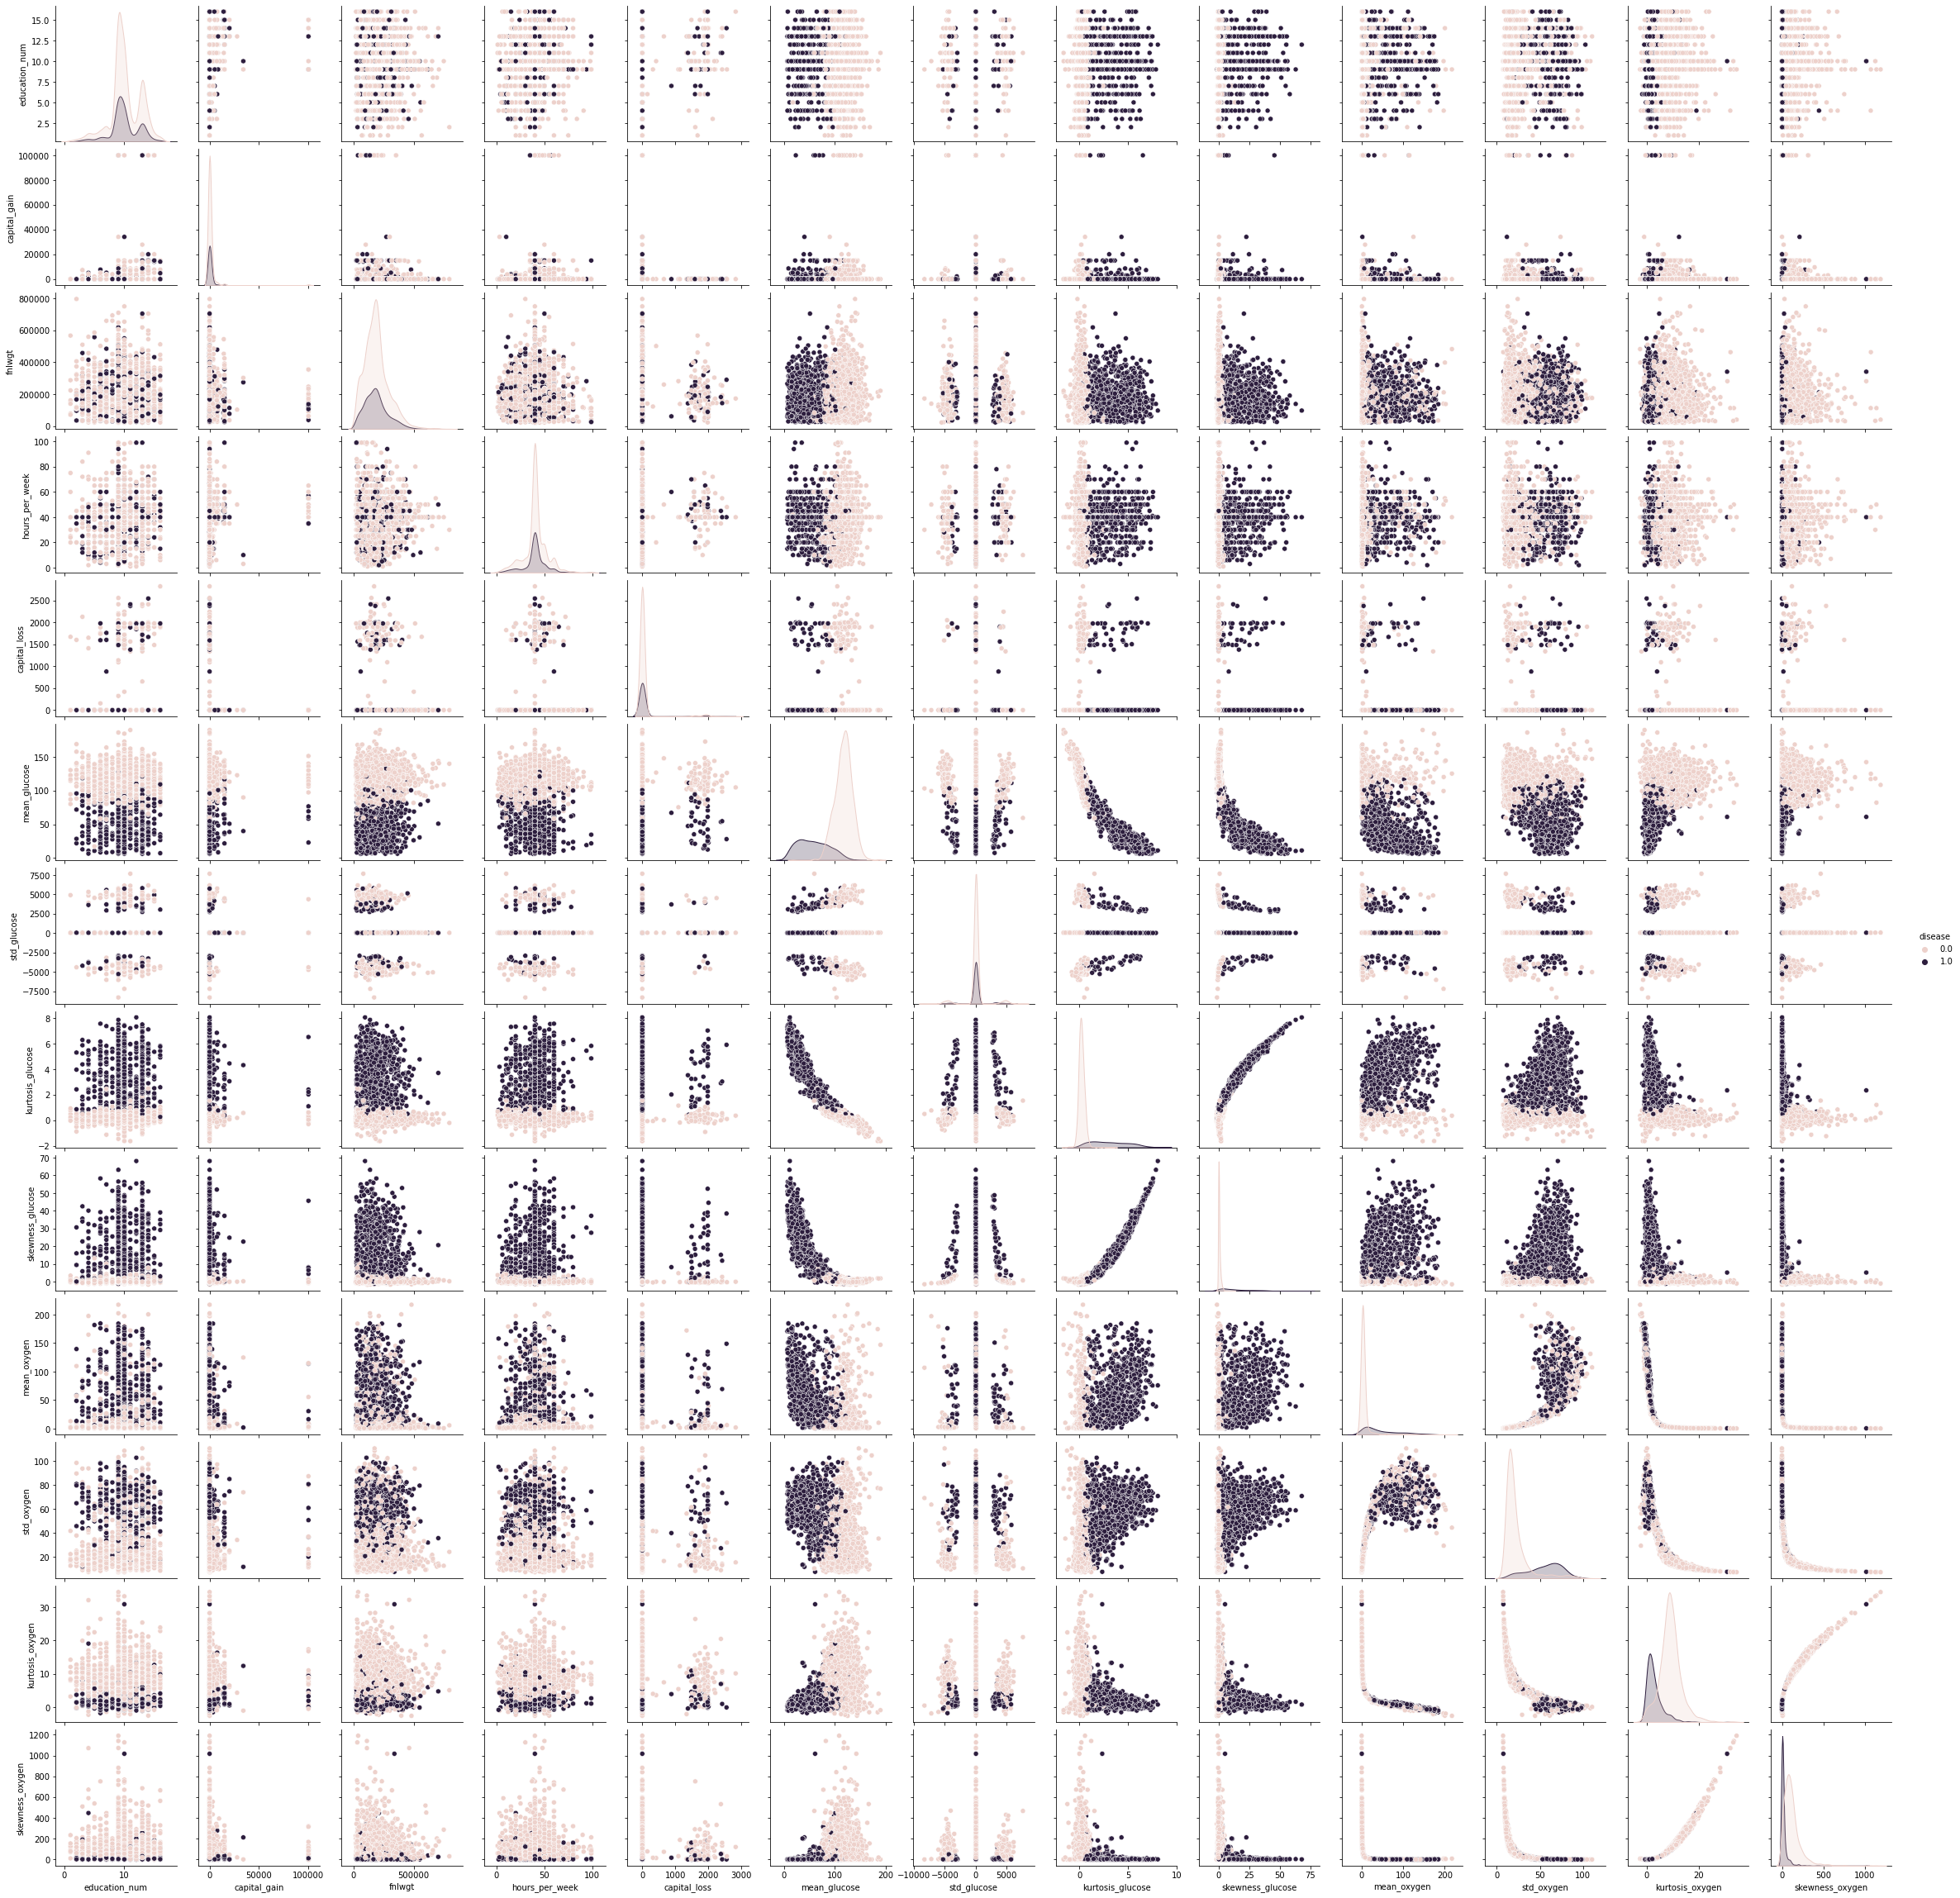

In [26]:
sns.pairplot(diabetes_dataset, hue = "disease")

Príklad závislých atribútov. Tieto dáta by sa dali zobraziť na grafe jednej funkcie, čiže vieme povedať, že je medzi nimi závislosť.

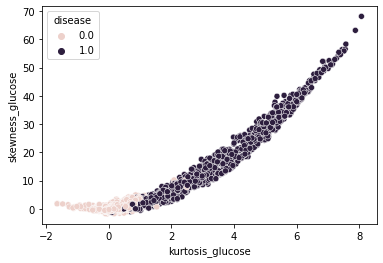

In [27]:
sns.scatterplot(x = "kurtosis_glucose", y = "skewness_glucose", hue = "disease", data = diabetes_dataset)

Vypočítaná Pearsonova korelácia, ktorá je veľmi vysoká (takmer sa rovná 1), takže tieto atribúty sú na sebe určite závislé. Na grafe je vidno, že dáta sa blížia nejakej pomyselnej priamke.

Pearson correlation: 0.962


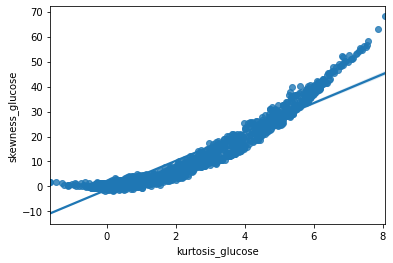

In [28]:
sns.regplot(x = "kurtosis_glucose", y = "skewness_glucose", data = diabetes_dataset)
print("Pearson correlation: %.3f" % diabetes_dataset.kurtosis_glucose.corr(diabetes_dataset.skewness_glucose))

Na boxplotoch nižšie je jasne vidno, že chorí ľudia majú vyššie hodnoty kurtosis_glucose a skewness_glucose ako zdraví ľudia.

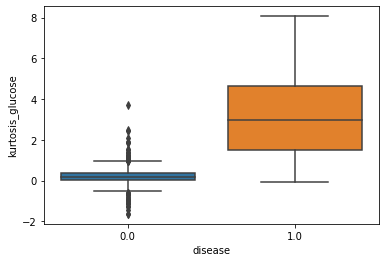

In [29]:
sns.boxplot(x = 'disease', y = 'kurtosis_glucose', data = diabetes_dataset)

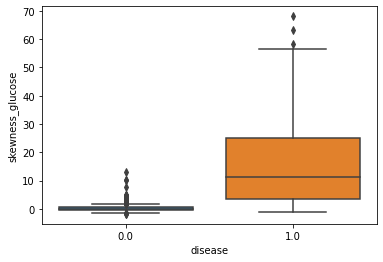

In [30]:
sns.boxplot(x = 'disease', y = 'skewness_glucose', data = diabetes_dataset)

Tieto dáta by sa tiež dali zobraziť na grafe jednej funkcie, čiže vieme povedať, že je medzi nimi závislosť.

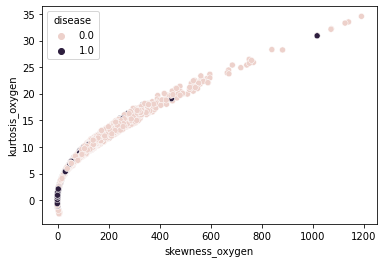

In [31]:
sns.scatterplot(x = "skewness_oxygen", y = "kurtosis_oxygen", hue = "disease", data = diabetes_dataset)

Vypočítana Pearsonova korelácia, ktorá je veľmi vysoká, tieto atribúty budú na sebe závislé.

Pearson correlation: 0.917


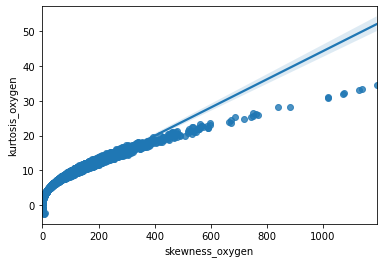

In [32]:
sns.regplot(x = "skewness_oxygen", y = "kurtosis_oxygen", data = diabetes_dataset)
print("Pearson correlation: %.3f" % diabetes_dataset.kurtosis_oxygen.corr(diabetes_dataset.skewness_oxygen))

Na boxplotoch nižšie je jasne vidno, že chorí ľudia majú nižšie hodnoty kurtosis_oxygen a skewness_oxygen ako zdraví ľudia.

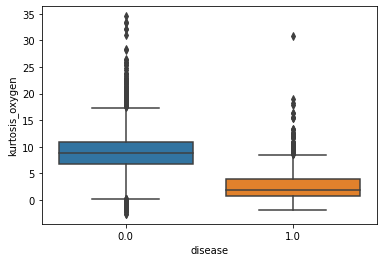

In [33]:
sns.boxplot(x = 'disease', y = 'kurtosis_oxygen', data = diabetes_dataset)

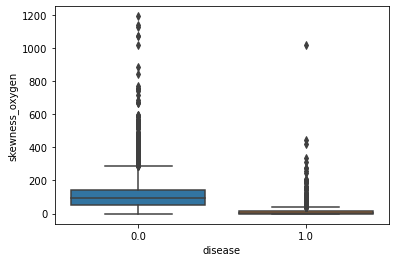

In [34]:
sns.boxplot(x = 'disease', y = 'skewness_oxygen', data = diabetes_dataset)

Príklad dát rozdelených na zhluky. Tieto atribúty pravdepodobne na sebe závislé nebudú, ale môžme pozorovať rozdelenie na 2 zhluky, čo bude tiež viesť k nejakému záveru. Je vidieť, že chorí ľudia majú pravdepodobne vyššie hodnoty krutosis_glucose a nižšie hodnoty skewness_oxygen.

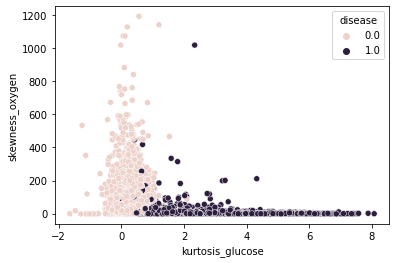

In [35]:
sns.scatterplot(x = "kurtosis_glucose", y = "skewness_oxygen", hue = "disease", data = diabetes_dataset)

Je vidno, že aj korelácia medzi týmito atribútmi je slabšia.

Pearson correlation: -0.347


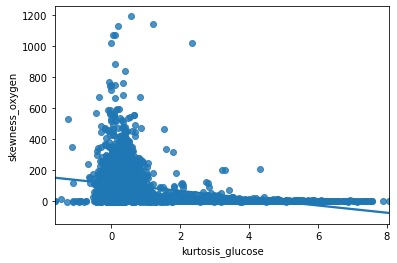

In [36]:
sns.regplot(x = "kurtosis_glucose", y = "skewness_oxygen", data = diabetes_dataset)
print("Pearson correlation: %.3f" % diabetes_dataset.kurtosis_glucose.corr(diabetes_dataset.skewness_oxygen))

Na boxplotoch sa ale môžeme presvedčiť, že chorí ľudia majú vyššie hodnoty krutosis_glucose a nižšie hodnoty skewness_oxygen.

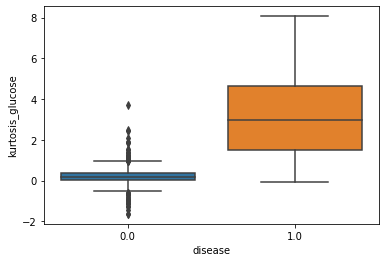

In [37]:
sns.boxplot(x = 'disease', y = 'kurtosis_glucose', data = diabetes_dataset)

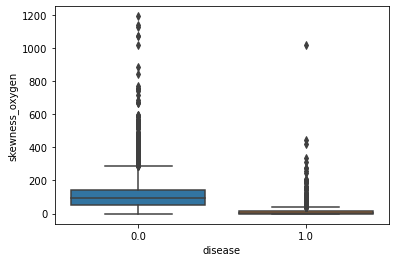

In [38]:
sns.boxplot(x = 'disease', y = 'skewness_oxygen', data = diabetes_dataset)

Príklad chaotického rozhodenia. Dáta, ktoré sú tu, sú veľmi rozhádzané a pravdepodobne nebudú mať žiadnu závislosť. Nevidíme ani žiadne zhluky dát, takže toto rozhodenie bude asi bezvýznamné.

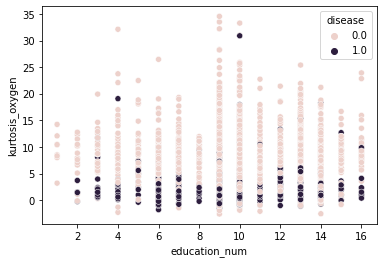

In [39]:
sns.scatterplot(x = "education_num", y = "kurtosis_oxygen", hue = "disease", data = diabetes_dataset)

Podľa korelácie vieme na isto povedať, že atribúty na sebe nezávisia. Korelácia je takmer nulová.

Pearson correlation: 0.002


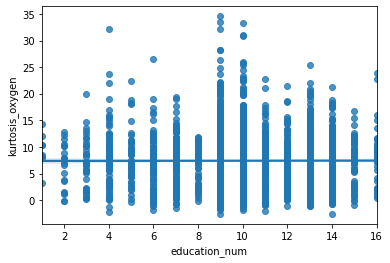

In [40]:
sns.regplot(x = "education_num", y = "kurtosis_oxygen", data = diabetes_dataset)
print("Pearson correlation: %.3f" % diabetes_dataset.education_num.corr(diabetes_dataset.kurtosis_oxygen))

Aj boxploty vyzerajú rovnako, čiže nevieme z nich povedať jednoznačný záver.

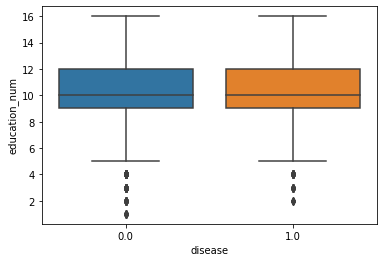

In [41]:
sns.boxplot(x = 'disease', y = 'education_num', data = diabetes_dataset)

Vyššie sme vyberali dáta na analýzu podľa grafov a ich vizualizácie. Existuje ale jednoduchý spôsob ako zistiť závislosť medzi atribútmi. Je to takzvaná heatmapa. Vykreslíme si ju a presne vidíme podľa farby, ktoré atribúty sú závislé. Čím je farba svetlejšia, alebo tmavšia, tý väčšia závislosť. Atribúty, ktoré majú farbu okolo nuly čiže červenú/ružovú/tmavo oranžovú/jemne fialovú sú nezávislé.

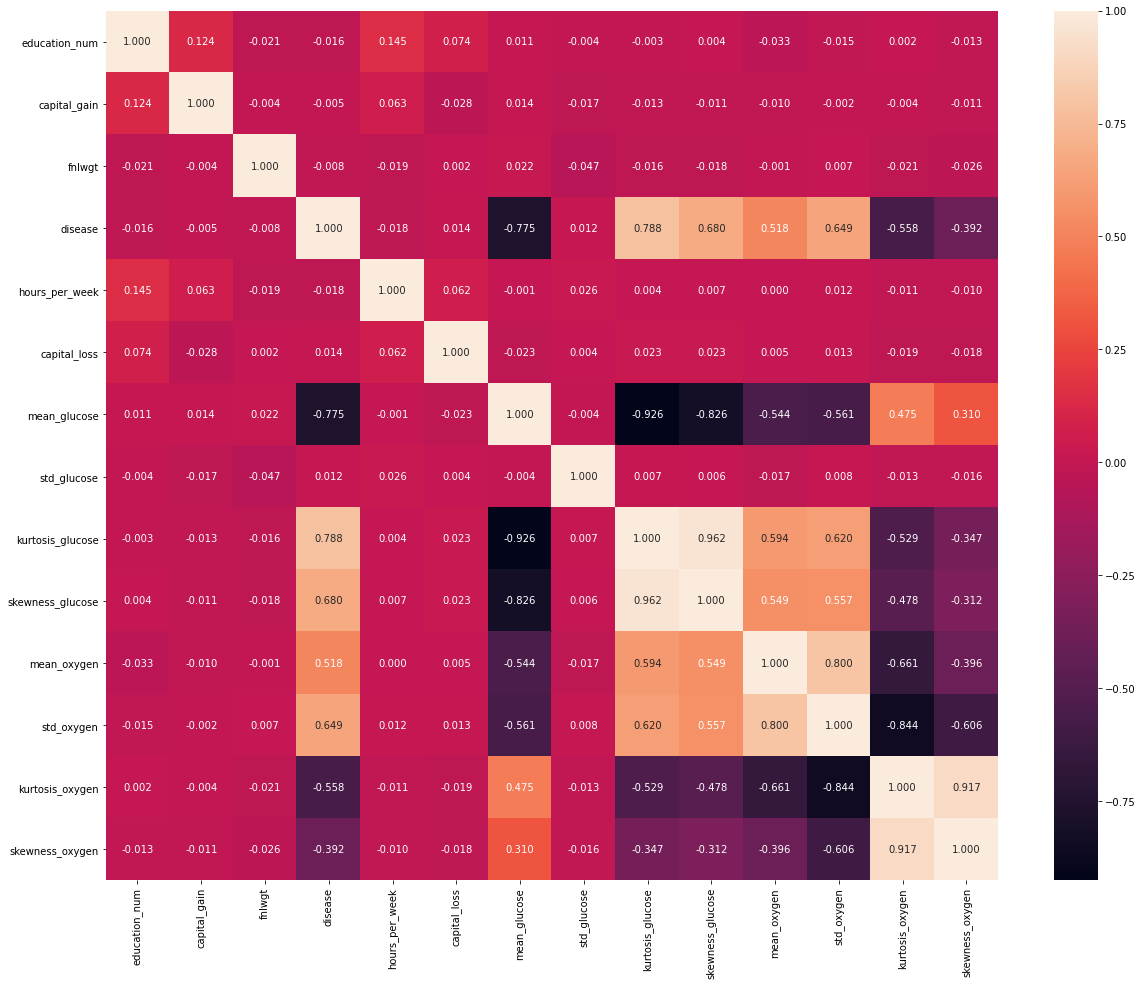

In [42]:
fig, ax = plt.subplots(figsize = (20, 16))
sns.heatmap(diabetes_dataset.corr(), ax = ax, annot = True, fmt = ".3f")

Porovnanie kategorického atribútu s kategorickým. Zobrazenie ľudí s cukrovkou podľa rasy.

In [43]:
dia_race = pd.crosstab(index = diabetes_dataset["disease"], columns = diabetes_dataset["race"])
dia_race.index = ["0", "1"]
dia_race

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,??
0,29,84,246,19,2272,94
1,9,30,75,11,776,31


V tabuľke vidíme, že pomer ľudí s cukrovkou určitej rasy je približne rovnaký ako ľudí s cukrovkou inej rasy.

In [44]:
dia_race_perc = pd.crosstab(index = diabetes_dataset["disease"], 
                                  columns = diabetes_dataset["race"], 
                                  normalize = 'columns')
dia_race_perc.index = ["0", "1"]
dia_race_perc

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,??
0,0.763158,0.736842,0.766355,0.633333,0.745407,0.752
1,0.236842,0.263158,0.233645,0.366667,0.254593,0.248


Podľa heatmapy vieme povedať, že cukrovka takmer vôbec nezávisí na tom akej rasy je človek.

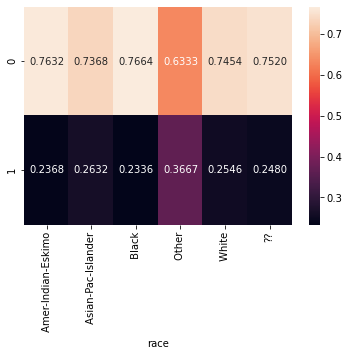

In [45]:
sns.heatmap(dia_race_perc, annot = True, fmt = ".4f")

Zobrazenie ľudí s cukrovkou podľa príjmu.

In [46]:
dia_income = pd.crosstab(index = diabetes_dataset["disease"], columns = diabetes_dataset["income"])
dia_income.index = ["0", "1"]
dia_income

income,<=50K,>50K
0,2243,696
1,776,237


Taktiež pomer ľudí s cukrovkou, podľa príjmu je takmer totožný.

In [47]:
dia_income_perc = pd.crosstab(index = diabetes_dataset["disease"], 
                                  columns = diabetes_dataset["income"], 
                                  normalize = 'columns')
dia_income_perc.index = ["0", "1"]
dia_income_perc

income,<=50K,>50K
0,0.742961,0.745981
1,0.257039,0.254019


Podľa heatmapy vieme povedať, že cukrovka vôbec nezávisí na príjme človeka.

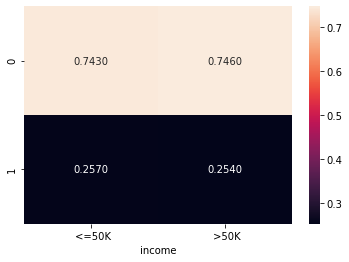

In [48]:
sns.heatmap(dia_income_perc, annot = True, fmt = ".4f")

## Formulácia a štatistické overenie hypotéz o dátach

### Hypotéza č.1 - Pacienti s cukrovkou majú v priemere nižšiu hodnotu kurtosis oxygen

Najprv sa pozrieme, či existuje vzťah medzi ochorením a látkou kurtosis oxygen

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


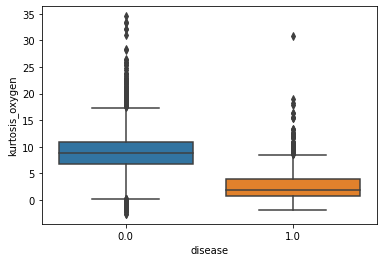

In [49]:
sns.boxplot("disease", "kurtosis_oxygen", data=diabetes_dataset)

Vzťah existuje. Ďalej vidíme, že medzi nimi existuje rozdiel, ale chceme zistiť, či je signifikantný.

Teraz si overíme normálnosť rozdelenia pomocou histogramu.

In [50]:
kurtosis_oxygen_0 = diabetes_dataset.loc[diabetes_dataset['disease']==0, 'kurtosis_oxygen']
kurtosis_oxygen_0 = kurtosis_oxygen_0.dropna()
kurtosis_oxygen_1 = diabetes_dataset.loc[diabetes_dataset['disease']==1, 'kurtosis_oxygen']
kurtosis_oxygen_1 = kurtosis_oxygen_1.dropna()

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


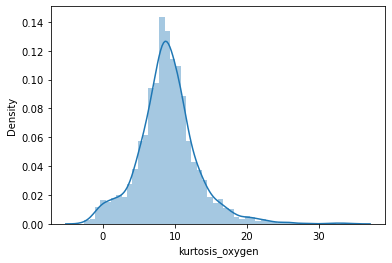

In [51]:
sns.distplot(kurtosis_oxygen_0)

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


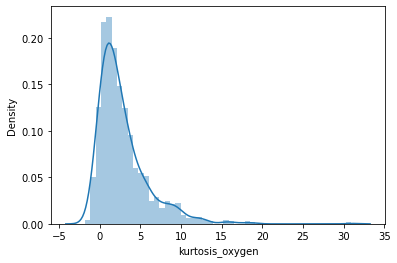

In [52]:
sns.distplot(kurtosis_oxygen_1)

V histogramoch vidíme pár outlierov, tých sa teraz zbavíme.

In [53]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

In [54]:
kurtosis_oxygen_0_outliers = identify_outliers(kurtosis_oxygen_0)
kurtosis_oxygen_0 = kurtosis_oxygen_0.drop(kurtosis_oxygen_0_outliers.index)
kurtosis_oxygen_1_outliers = identify_outliers(kurtosis_oxygen_1)
kurtosis_oxygen_1 = kurtosis_oxygen_1.drop(kurtosis_oxygen_1_outliers.index)

Znovu si vykreslíme histogramy, ale teraz už bez outlierov.

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


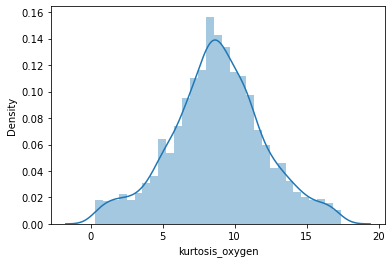

In [55]:
sns.distplot(kurtosis_oxygen_0)

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


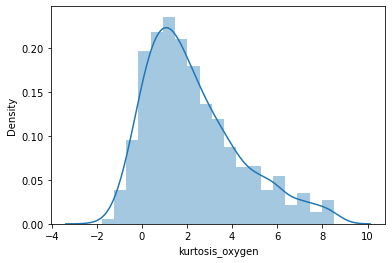

In [56]:
sns.distplot(kurtosis_oxygen_1)

Teraz si overíme normálnosť rozdelenie vykreslením QQ grafov.

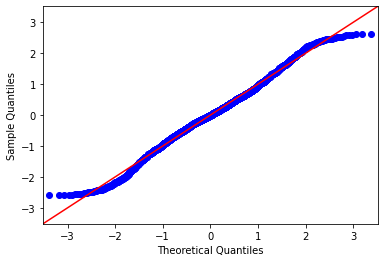

In [57]:
_ = sm.ProbPlot(kurtosis_oxygen_0, fit=True).qqplot(line='45')

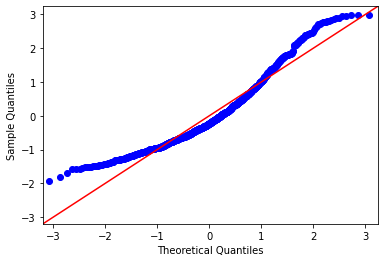

In [58]:
_ = sm.ProbPlot(kurtosis_oxygen_1, fit=True).qqplot(line='45')

A použijeme Shapiro-Wilkow test

In [59]:
stats.shapiro(kurtosis_oxygen_0)

ShapiroResult(statistic=0.9938005805015564, pvalue=1.907650037935582e-09)

In [60]:
stats.shapiro(kurtosis_oxygen_0)

ShapiroResult(statistic=0.9938005805015564, pvalue=1.907650037935582e-09)

Keďže je p < 0,05, nulovú hypotézu zamietame a dáta pravdepodobne pochádzajú z iného ako normálneho rozdelenia.

Teraz použijeme Levenov test, ktorý testuje, či vzorky pochádzajú z rozdelení s rovnakými varianciami.

In [61]:
stats.levene(kurtosis_oxygen_0, kurtosis_oxygen_1)

LeveneResult(statistic=157.71682586721712, pvalue=1.8583024255803086e-35)

Kedže hodnota p < 0,05, môžeme povedať, že vzorky pochádzajú z distribúcií s rôznymi varianciami, preto teraz použijeme Mann-Whiteneyho U-test.

In [62]:
stats.mannwhitneyu(kurtosis_oxygen_0, kurtosis_oxygen_1)

MannwhitneyuResult(statistic=140221.0, pvalue=0.0)

Pravdepodobnosť chyby prvého rádu je menej ako 1 promile, preto môžeme povedať, že rozdiel v týchto hodnotách je štatisticky signifikantný a táto hypotéza platí.

### Hypotéza č.2 - Pacienti s cukrovkou majú v priemere vyššiu hodnotu skewness_glucose

Najskôr zistíme či existuje prepojenie medzi cukrovkou a látkou skewness_glucose.

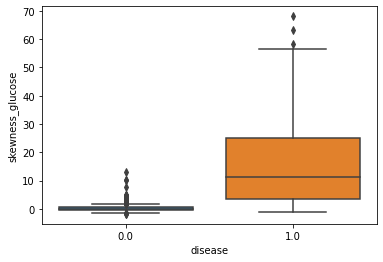

In [94]:
sns.boxplot(x = 'disease', y = 'skewness_glucose', data = diabetes_dataset)

Nejaký rozdiel tam je, to vidíme aj podľa vizuálneho zobrazenia. Či je tento rozdiel signifikantný musíme zistiť podľa štatistického testu.

In [95]:
skewness_glucose_0 = diabetes_dataset.loc[diabetes_dataset['disease'] == 0, 'skewness_glucose']
skewness_glucose_0 = skewness_glucose_0.dropna()
skewness_glucose_1 = diabetes_dataset.loc[diabetes_dataset['disease'] == 1, 'skewness_glucose']
skewness_glucose_1 = skewness_glucose_1.dropna()

Normálnosť funkcie si overíme pomocou histogramov.

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


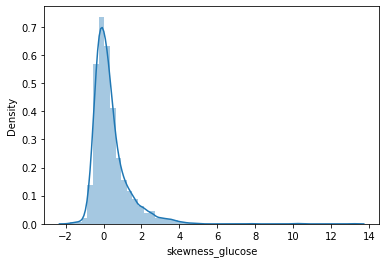

In [96]:
sns.distplot(skewness_glucose_0)

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


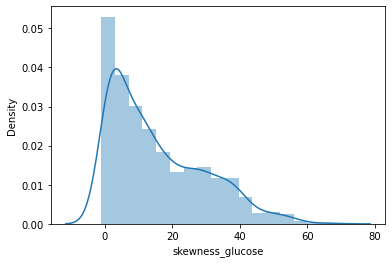

In [97]:
sns.distplot(skewness_glucose_1)

Na histogramoch vidíme, že sa v nich nachádza viacero outlierov.

In [98]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

Pokusíme sa zbaviť týchto outlierov.

In [99]:
skewness_glucose_0 = skewness_glucose_0.drop(identify_outliers(skewness_glucose_0).index)
skewness_glucose_1 = skewness_glucose_1.drop(identify_outliers(skewness_glucose_1).index)

Vykreslíme si histogramy s odstránenými outliermi.

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


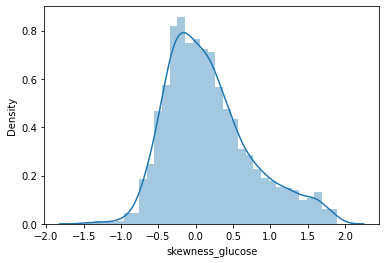

In [69]:
sns.distplot(skewness_glucose_0)

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


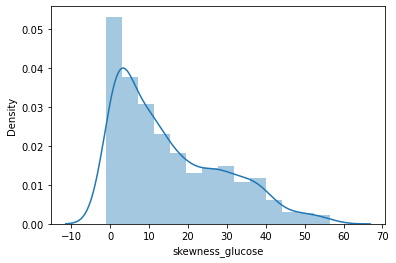

In [70]:
sns.distplot(skewness_glucose_1)

Vykreslíme si pre každú vzorku QQ-grafy.

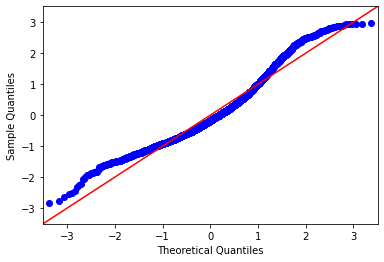

In [71]:
_ = sm.ProbPlot(skewness_glucose_0, fit = True).qqplot(line = '45')

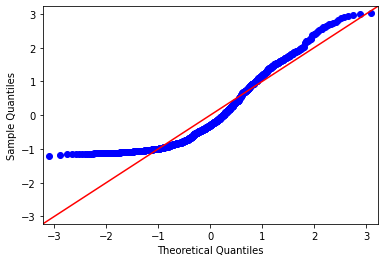

In [72]:
_ = sm.ProbPlot(skewness_glucose_1, fit = True).qqplot(line = '45')

Skúsime si overiť možnosť použitia t-testu.

In [73]:
stats.shapiro(skewness_glucose_0)

ShapiroResult(statistic=0.9556959271430969, pvalue=4.607627539761078e-28)

In [74]:
stats.shapiro(skewness_glucose_1)

ShapiroResult(statistic=0.9006337523460388, pvalue=4.89012804386629e-25)

Kedže je pvalue < 0,05 pre obe vzorky, nulovú hypotézu zamietame a dáta pravdepodobne pochádzajú z iného ako normalného rozdelenia. Skúsime ešte použiť Leventeho test, ktorý je taktiež predpokladom použitia t-testu.

In [75]:
stats.levene(skewness_glucose_0, skewness_glucose_1)

LeveneResult(statistic=3657.15573992221, pvalue=0.0)

Kedže je pvalue < 0,05 znamená to, že všetky vstupné vzorky pochádzajú z rozdelení s rôznymi varianciami. Nemôžeme teda použit t-test, ale použijeme Mann-Whiteneyho U-test

In [101]:
stats.mannwhitneyu(skewness_glucose_0, skewness_glucose_1)

MannwhitneyuResult(statistic=120022.0, pvalue=0.0)

Hodnota pvalue < 0.001 takže vieme povedať, že pravdepodobnosť chyby prvého rádu je menej ako 1 promile, to znamená, že rozdiel v týchto hodnotach je signifikantný, preto táto hypotéza platí.

## Identifikácia problémov v dátach spolu s predpokladaným scenárom riešenia v ďalšej fáze

Nevhodná štruktúra dát sa nachádza v atribúte medical_info v datasete other_train.csv, kde je atribút zložený z viacero zložiek (mean_glucose, std_glucose, kurtosis_glucose, skewness_glucose, mean_oxygen, std_oxygen, kurtosis_oxygen, skewness_oxygen), tento atribút sme už rozdelili do viacero stĺpcov. Taktiež aj atribút address obsahuje viac zložiek, ale nepredpokladáme, že by hodnota Y významne závisela na tomto atribúte, preto počítame s tým, že tento atribút nebudeme podrobnejšie deliť.

In [77]:
df_other_train.shape[0] - df_personal_train.shape[0]

50

Zistili sme, že dataset other_train.csv obsahuje o 50 záznamov viac ako personal_train. Predpokladáme, že v datasete other_train.csv sa budú nachádzať duplicitné záznamy.

In [78]:
df_other_train.duplicated().sum()

0

Duplicitné riadky sme nanašli, ale ešte nás zaujíma, či nemáme viacero záznamov rovnakého človeka. Preto ich skúsime nájsť podľa atribútov name a address. Sú nutné oba záznamy, pretože môže existovať viacero ľudí s rovnakým menom, adresa nám slúži ako kontrolný atribút, pretože predpokladáme, že rozdielny ľudia s rovnakým menom nebývajú na rovnakej adrese.

In [53]:
df_other_train.duplicated(['name','address']).sum()

50

Našli sme 50 duplicít, čo zodpovedá rozdielu záznamov medzi týmito datasetmi, vypíšeme si pár z nich.

In [58]:
df_other_train[df_other_train.name.isin(df_other_train.name[df_other_train.name.duplicated()])].sort_values(by=['name']).head(6)

,Unnamed: 0,name,address,race,marital-status,occupation,pregnant,education-num,relationship,capital-gain,education,fnlwgt,class,income,medical_info,native-country,hours-per-week,capital-loss,workclass
2078,2078,Alex Stubblefield,"PSC 1476, Box 5156\r\nAPO AE 20184",White,Married-civ-spouse,Protective-serv,FALSE,10.0,Husband,0.0,Some-college,194417.0,NaN,>50K,"{'mean_glucose':'39.3046875','std_glucose':'42...",United-States,40.0,0.0,Local-gov
2682,2682,Alex Stubblefield,"PSC 1476, Box 5156\r\nAPO AE 20184",NaN,Married-civ-spouse,NaN,FALSE,10.0,Husband,0.0,Some-college,NaN,1.0,>50K,"{'mean_glucose':'39.3046875','std_glucose':'42...",United-States,40.0,0.0,Local-gov
2416,2416,Ashley Lyons,"4166 Sara Points\r\nHernandezview, WY 62853",White,Married-civ-spouse,Handlers-cleaners,f,9.0,Husband,NaN,HS-grad,155972.0,NaN,>50K,NaN,United-States,40.0,0.0,Private
467,467,Ashley Lyons,"4166 Sara Points\r\nHernandezview, WY 62853",White,Married-civ-spouse,NaN,f,9.0,Husband,0.0,HS-grad,NaN,0.0,>50K,"{'mean_glucose':'111.1953125','std_glucose':'4...",United-States,NaN,0.0,Private
2553,2553,Billy Clark,"3859 Melissa Bridge Apt. 723\r\nShawnfurt, GA ...",White,Divorced,Exec-managerial,f,9.0,Not-in-family,NaN,HS-grad,195516.0,0.0,<=50K,"{'mean_glucose':'103.8046875','std_glucose':'4...",United-States,40.0,0.0,Local-gov
3408,3408,Billy Clark,"3859 Melissa Bridge Apt. 723\r\nShawnfurt, GA ...",White,Divorced,Exec-managerial,f,9.0,Not-in-family,0.0,NaN,NaN,0.0,<=50K,NaN,United-States,NaN,0.0,Local-gov


Vidíme tu, že ľudia s rovnakým menom majú aj rovnakú adresu, preto predpokladáme, že ide o rovnakého človeka.

Rovnaký postup zvolíme aj pre druhý dataset

In [81]:
df_personal_train.duplicated().sum()

0

In [82]:
df_personal_train.name.duplicated().sum()

0

Zistili sme, že v druhom datasete sa žiadne duplicity nenachádzajú.

Duplicitné záznamy chceme nahradiť len 1 záznamom a v prípade chýbajúcich hodnôt doplníme tieto hodnoty z druhého záznamu, ak budú existovať.

Teraz ideme nájsť nejednotné formáty dát. Budú nás zaujímať atribúty: marital-status, pregnant, education, workclass a z druhého datasetu age a date_of_birth.

In [19]:
df_other_train['marital-status'].unique()

array([' Widowed', ' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Separated', nan, ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

V tomto atribúte vidíme priveľa hodnôt, rozsah týchto hodnôt by sme chceli zúžiť, pravdepodobne na 2 hodnoty: married a single

In [83]:
df_other_train['pregnant'].unique()

array(['f', 'FALSE', 'F', 't', nan, 'TRUE', 'T'], dtype=object)

Hodnoty predstavujúce rovnaký typ zjednotíme na jeden formát, napr. f, FALSE, F budú mať jeden formát.

In [18]:
df_other_train['education'].unique()

array([' 9th', ' Bachelors', ' HS-grad', ' Some-college', nan, ' 12th',
       ' 7th-8th', ' Assoc-voc', ' Masters', ' 11th', ' 10th',
       ' Prof-school', ' Assoc-acdm', ' 5th-6th', ' 1st-4th',
       ' Doctorate', ' Preschool'], dtype=object)

V tomtot atribúte je taktiež priveľa hodnôt, tieto by sme chceli zjednotiť na menej hodnôt, že hodnoty 1st - 12th zaradíme do primary school, hodnoty Bachelors, Masters, Doctorate do collage, atď 

In [84]:
df_other_train['workclass'].unique()

array([' Private', 'private', ' Local-gov', ' State-gov', nan,
       ' Self-emp-inc', ' Self-emp-not-inc', 'state-gov', ' Federal-gov',
       ' ?', 'self-emp-not-inc', 'local-gov', 'federal-gov', '?',
       'self-emp-inc', ' Never-worked', ' Without-pay'], dtype=object)

Rovnako ako pri atribúte pregnant tu je viacero názvov pre rovnakú hodnotu.

In [85]:
age_formats = df_personal_train['age'].astype(str).str.replace('\d', '0')
age_formats.unique()

array(['00', '0', '000', '-0'], dtype=object)

V atribúte vek vidíme záporný aj trojciferný vek, tento vek zaraďujeme medzi outliers, taktiež vek chceme nahradiť istými rozsahmi, napr. 0-17 predstavujú skupinu child...

In [86]:
date_formats = df_personal_train.date_of_birth
date_formats = date_formats.str.replace('\d', '0')
date_formats.unique()

array(['0000-00-00', '0000/00/00', '0000-00-00 00:00:00',
       '0000-00-00 00 00 00', '00/00/0000', '00-00-00'], dtype=object)

Dátum narodenia zmeníme na jednotný formát. Časový údaj v dátume narodenia nám je zbytočný.

In [87]:
df_other_train.isnull().sum()

Unnamed: 0          0
name                0
address             0
race              292
marital-status     13
occupation         22
pregnant           14
education-num      22
relationship       29
capital-gain       14
education          11
fnlwgt             15
class              23
income             11
medical_info       17
native-country     17
hours-per-week     17
capital-loss       10
workclass          17
dtype: int64

Ako vidíme, chýbajú nám hodnoty v atribútoch 3-18, na chýbajúce hodnoty chceme použiť rôzne techniky, napríklad: doplniť hodnotu mediánom, priemerom, dopočítať z iného atribútu alebo takéto záznamy vymažeme...

Na vychýlené hodnoty môžeme použiť tiež techniky doplnenia mediánom, priemerom, atď, ale to závisí od atribútu, napríklad záznam 100 ročného človeka určite zmažene, pretože je nezmysel mu meniť vek na priemer. 

In [62]:
df_personal_train.isnull().sum()

Unnamed: 0       0
name             0
address          0
age              0
sex              0
date_of_birth    0
dtype: int64

V druhom datasete nechýbajú žiadne hodnoty.

## 2. časť - Predspracovanie

Spájanie dát

In [67]:
df_other_valid = read_csv("data/other_valid.csv")
df_personal_valid = read_csv("data/personal_valid.csv")

df_merged1 = pd.merge(df_personal_train, df_other_train, on=['name', 'address'])
df_merged2 = pd.merge(df_other_valid, df_personal_valid, on=['name', 'address'])

df_merged1 = df_merged1.rename(columns={'Unnamed: 0_x': 'index',})
df_merged1

,index,name,address,age,sex,date_of_birth,Unnamed: 0_y,race,marital-status,occupation,...,capital-gain,education,fnlwgt,class,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",58,Male,1961-04-27,717,White,Married-civ-spouse,Transport-moving,...,0.0,Assoc-voc,241259.0,0.0,<=50K,"{'mean_glucose':'132.9296875','std_glucose':'6...",United-States,40.0,0.0,Private
1,1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",43,Female,1976-09-12,3106,Black,Divorced,Other-service,...,0.0,HS-grad,172232.0,0.0,<=50K,"{'mean_glucose':'103.1171875','std_glucose':'-...",United-States,30.0,0.0,Private
2,2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",51,Male,1967-11-12,3601,White,Married-civ-spouse,Exec-managerial,...,0.0,Some-college,345705.0,0.0,<=50K,"{'mean_glucose':'125.5390625','std_glucose':'5...",United-States,40.0,0.0,Private
3,3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",66,Male,1953-06-02,3209,Amer-Indian-Eskimo,Never-married,Handlers-cleaners,...,0.0,HS-grad,149297.0,0.0,<=50K,"{'mean_glucose':'136.0859375','std_glucose':'4...",United-States,30.0,0.0,Private
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",45,Female,1974/09/11,1632,White,Never-married,Craft-repair,...,0.0,Some-college,253262.0,0.0,<=50K,"{'mean_glucose':'99.328125','std_glucose':'38....",United-States,40.0,0.0,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,3928,Clair Pinkleton,"8582 Lee Roads\r\nCostaburgh, SC 21897",53,Female,1966-04-29,2554,White,Never-married,Adm-clerical,...,0.0,Bachelors,368739.0,0.0,<=50K,"{'mean_glucose':'161.4453125','std_glucose':'n...",United-States,40.0,0.0,Private
3979,3929,William Pope,68430 Erik Terrace Suite 279\r\nPort Adamborou...,81,Male,1938-10-24 00:00:00,2375,White,Never-married,Other-service,...,0.0,HS-grad,387430.0,1.0,<=50K,"{'mean_glucose':'114.1484375','std_glucose':'5...",United-States,18.0,0.0,private
3980,3930,Jared Kinsey,Unit 8416 Box 3801\r\nDPO AE 31166,46,Female,1973-02-23,2871,Black,Divorced,Adm-clerical,...,0.0,Bachelors,137304.0,0.0,<=50K,"{'mean_glucose':'128.734375','std_glucose':'57...",United-States,40.0,0.0,Private
3981,3931,Frederick Lawley,"34420 Brian Stream\r\nLake Michaeltown, MS 01832",46,Female,1973-08-09 00:00:00,3127,White,Never-married,Other-service,...,0.0,10th,65225.0,1.0,<=50K,"{'mean_glucose':'70.7421875','std_glucose':'44...",United-States,40.0,0.0,Private


In [68]:
df_merged2 = df_merged2.rename(columns={'Unnamed: 0_x': 'index',})
df_merged2['index'] = df_merged2['index'] + df_merged1.shape[0]
df_merged2['index']

0       3983
1       3984
2       3985
3       3986
4       3987
        ... 
1356    5338
1357    5339
1358    5341
1359    5342
1360    5343
Name: index, Length: 1361, dtype: int64

In [69]:
df_merged = df_merged1.merge(df_merged2, how='outer')

# df_merged = df_merged.rename(columns={'Unnamed: 0_x': 'index',})
# df_merged = df_merged.drop('Unnamed: 0_y', 1)
df_merged

,index,name,address,age,sex,date_of_birth,Unnamed: 0_y,race,marital-status,occupation,...,capital-gain,education,fnlwgt,class,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",58,Male,1961-04-27,717,White,Married-civ-spouse,Transport-moving,...,0.0,Assoc-voc,241259.0,0.0,<=50K,"{'mean_glucose':'132.9296875','std_glucose':'6...",United-States,40.0,0.0,Private
1,1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",43,Female,1976-09-12,3106,Black,Divorced,Other-service,...,0.0,HS-grad,172232.0,0.0,<=50K,"{'mean_glucose':'103.1171875','std_glucose':'-...",United-States,30.0,0.0,Private
2,2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",51,Male,1967-11-12,3601,White,Married-civ-spouse,Exec-managerial,...,0.0,Some-college,345705.0,0.0,<=50K,"{'mean_glucose':'125.5390625','std_glucose':'5...",United-States,40.0,0.0,Private
3,3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",66,Male,1953-06-02,3209,Amer-Indian-Eskimo,Never-married,Handlers-cleaners,...,0.0,HS-grad,149297.0,0.0,<=50K,"{'mean_glucose':'136.0859375','std_glucose':'4...",United-States,30.0,0.0,Private
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",45,Female,1974/09/11,1632,White,Never-married,Craft-repair,...,0.0,Some-college,253262.0,0.0,<=50K,"{'mean_glucose':'99.328125','std_glucose':'38....",United-States,40.0,0.0,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,5338,Arturo Mckee,"64582 Mcgee Orchard\r\nBridgeschester, VT 81156",60,Male,1959-09-21,1101,White,Married-civ-spouse,Prof-specialty,...,0.0,Prof-school,132601.0,1.0,>50K,"{'mean_glucose':'28.1953125','std_glucose':'39...",United-States,40.0,0.0,Private
5340,5339,Bennie Jones,"9406 Desiree Rest\r\nSouth Laurafort, ME 72779",43,Male,76-09-04,57,White,Married-civ-spouse,Transport-moving,...,0.0,HS-grad,85434.0,0.0,<=50K,"{'mean_glucose':'110.0546875','std_glucose':'4...",United-States,40.0,0.0,Private
5341,5341,Bobby Hawk,"41416 Ellis Island\r\nEdgarchester, OR 73214",50,Male,1968-12-02,537,White,Married-civ-spouse,Prof-specialty,...,5178.0,Bachelors,174575.0,0.0,>50K,"{'mean_glucose':'159.078125','std_glucose':'39...",United-States,40.0,0.0,Local-gov
5342,5342,Wally Suggs,"624 Jeremiah Inlet Suite 082\r\nEast Jerome, H...",49,Female,1970-04-05,503,White,Divorced,Sales,...,0.0,HS-grad,148903.0,0.0,<=50K,"{'mean_glucose':'116.46875','std_glucose':'35....",United-States,40.0,0.0,private


In [70]:
dir_in = 'data'
filenames = [i for i in glob.glob(dir_in + '/*')]
print(*filenames, sep='\n')

data\other_train.csv
data\other_valid.csv
data\personal_train.csv
data\personal_valid.csv


In [78]:
df_merged.set_index('index', inplace=True)
df_merged

KeyError: "None of ['index'] are in the columns"

In [77]:
df_merged['pregnant'].unique()

array(['f', 't', 'TRUE', nan, 'T'], dtype=object)

In [25]:
# not_pregnant_values = ["n/a", "na", "--"]
# df = pd.read_csv("property data.csv", na_values = missing_values)

df_merged['pregnant'].loc[(df_merged['pregnant'] == "F") | (df_merged['pregnant'] == "FALSE")] = "f"
df_merged['pregnant'].loc[(df_merged['pregnant'] == "T") | (df_merged['pregnant'] == "TRUE")] = "t"

In [73]:
def cleanse_some_values(data_frame, column, change_from, change_to):
    data_frame.loc[data_frame[column] == change_from, column] = change_to

In [76]:
cleanse_values(df_merged, 'pregnant', "F", "f")
cleanse_values(df_merged, 'pregnant', "FALSE", "f")

In [79]:
df_merged

,name,address,age,sex,date_of_birth,Unnamed: 0_y,race,marital-status,occupation,pregnant,...,capital-gain,education,fnlwgt,class,income,medical_info,native-country,hours-per-week,capital-loss,workclass
index,,,,,,,,,,,,,,,,,,,,,
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",58,Male,1961-04-27,717,White,Married-civ-spouse,Transport-moving,f,...,0.0,Assoc-voc,241259.0,0.0,<=50K,"{'mean_glucose':'132.9296875','std_glucose':'6...",United-States,40.0,0.0,Private
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",43,Female,1976-09-12,3106,Black,Divorced,Other-service,f,...,0.0,HS-grad,172232.0,0.0,<=50K,"{'mean_glucose':'103.1171875','std_glucose':'-...",United-States,30.0,0.0,Private
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",51,Male,1967-11-12,3601,White,Married-civ-spouse,Exec-managerial,f,...,0.0,Some-college,345705.0,0.0,<=50K,"{'mean_glucose':'125.5390625','std_glucose':'5...",United-States,40.0,0.0,Private
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",66,Male,1953-06-02,3209,Amer-Indian-Eskimo,Never-married,Handlers-cleaners,f,...,0.0,HS-grad,149297.0,0.0,<=50K,"{'mean_glucose':'136.0859375','std_glucose':'4...",United-States,30.0,0.0,Private
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",45,Female,1974/09/11,1632,White,Never-married,Craft-repair,f,...,0.0,Some-college,253262.0,0.0,<=50K,"{'mean_glucose':'99.328125','std_glucose':'38....",United-States,40.0,0.0,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5338,Arturo Mckee,"64582 Mcgee Orchard\r\nBridgeschester, VT 81156",60,Male,1959-09-21,1101,White,Married-civ-spouse,Prof-specialty,f,...,0.0,Prof-school,132601.0,1.0,>50K,"{'mean_glucose':'28.1953125','std_glucose':'39...",United-States,40.0,0.0,Private
5339,Bennie Jones,"9406 Desiree Rest\r\nSouth Laurafort, ME 72779",43,Male,76-09-04,57,White,Married-civ-spouse,Transport-moving,f,...,0.0,HS-grad,85434.0,0.0,<=50K,"{'mean_glucose':'110.0546875','std_glucose':'4...",United-States,40.0,0.0,Private
5341,Bobby Hawk,"41416 Ellis Island\r\nEdgarchester, OR 73214",50,Male,1968-12-02,537,White,Married-civ-spouse,Prof-specialty,f,...,5178.0,Bachelors,174575.0,0.0,>50K,"{'mean_glucose':'159.078125','std_glucose':'39...",United-States,40.0,0.0,Local-gov
